<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>
<center><h1>MLE10 Midterm - Iain McKone</h1></center>

## Objectives
An intensive analysis of consumer behavior, applying techniques ranging from supervised, unsupervised learning, as well as semi-supervised learning.

&nbsp;
## Data
The data is in `dat/online_shoppers_intention.csv.gz`, from [Online Shoppers Purchasing Intention Dataset - UCI Machine Learning Repo](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

- The dataset consists of 10 numerical and 8 categorical variables.
- Target Labe;:  `Revenue` is the target label. 
    - This binary variable is imbalanced, specifically 84.5% of user journeys did NOT result in a purchase; in other words `Revenue` is False.
- Pages visited within Session, and Total Time spent in each category:
    - `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, and `Product Related Duration` 
    - Each represents the number of different types of pages visited by the visitor in that session 
    - and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g, moving from one page to another. 
- Features `Bounce Rate`, `Exit Rate` and `Page Value` represent  metrics measured by Google Analytics for each page in the e-commerce site. 
    - The value of `Bounce Rate` for a web page refers to the percentage of visitors who enter the site from that page and then leave (i.e., bounce) without triggering any other requests to the analytics server during that session. 
    - The value of `Exit Rate` for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
    - Feature `Page Value` represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- Feature `Special Day` indicates the closeness of the site visiting time to a specific special day
    - (e.g., Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. 
    - The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes 
    - operating system, browser, region, traffic type, 
    - visitor type as returning or new visitor, 
    - a boolean value indicating whether the date of the visit is weekend, and month of the year.

&nbsp;
## Tasks
### (50pts) Task 1:    Classification:  Build a highly predictive classification model
    a. Train the model for months June-Dec
    b. Test the model for months Feb-Mar
    c. Fit a logistic regression model
    d. Fit at least one other classification model
    e. Find and explain important features
    f.  Report and interpret the most meaningful classifications metrics
    g.  Show and explain the hyper-parameter fitting process.

    Point breakdown:
    - (10 pts)  Basic exploratory data analysis (EDA) 
                - Appropriate univariate descriptive statistics and figures
                - Appropriate bi-variate descriptive statistics and figures
    - ( 5 pts)  Advanced EDA
                - Free-response, shows us what they know! 
    - ( 5 pts)  Train/test split
    - (10 pts)  Feature selection
    - (15 pts)  Model fitting
    - ( 5 pts)  Performance points 

&nbsp;
### (25pts) Task 2:     Customer Segmentation
    a. Generate user-behavior clusters based on the purchasing behavior data for the complete dataset. 
    b. Cluster Analysis
        - How many clusters do you see? 
        - What are the significant differences between the various clusters in terms of:
            - the size of the clusters and 
            - purchase ratio. 
        - Perform as detailed analysis of the clusters as you can.
    c. Return plots and cluster images generated for the data.
    d. Perform a detailed analysis for each cluster corresponding to 
        - the variations in features and 
        - identify some behaviors corresponding to each particular cluster (e.g., 
            - which cluster represent new shoppers vs. 
            - brand conscious shoppers etc.).

    Point breakdown:
    - (15 pts)  Clustering code
    - (10 pts)  Clustering analysis

&nbsp;
### (15pts) Task 3:     Semi-Supervised Learning
    a. Consider you have training data with the `Revenue` attribute for records from June—September only. 
    b. For all records from October—December, however, `Revenue` attribute is missing. 
    c. Build a semi-supervised self-labeling model to estimate `Revenue` for the missing records in October—December 
        and then fit your classifier. 
    d. Report classification performance on February—March data set with and without the self-labeled data.

    1. If you do not consider the records from October—December, 
        a. generate the classification performance on test data
    2. After using the self-labeled data and training data together, 
        a. does the classification performance on test data improve? 
        b. Discuss which metrics are most important for your conclusion.

    Point breakdown:
    - (2 pts) Correctly split the data by month into labeled, unlabeled, and test 
    - (8 pts) Generate labels for unlabeled samples with a self labeling technique
    - (5 pts) Compare and contrast performance difference on test dataset between 
        a. labels only and 
        b. labels & self-labels

&nbsp;
### (10pts) Style and clarity
    a. Write clear, readable, well-commented code following [PEP8](https://peps.python.org/pep-0008/); also 
    b. include explanations in markdown cells, where appropriate. 

&nbsp;
## Deliverables:
- GitHub link to a single .ipynb notebook.
- Comments where appropriate.
- Figures, graphs, and tables where appropriate.
- Text explanations (in markdown cells) of what is being done and why.


## Pre-reqs

### Visual Studio Code:  local jupyter development
- Ctl+Shift+P:  ensure that the correct Python interpreter is selected
- Terminal:  activate conda environment
- Jupyter Notebook:  select environment

In [74]:

#---  Declarations
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import *


In [75]:


#--- module variables
from pathlib import Path


#--- set path refs
pth_pwd = Path().absolute()

kstr_pth_pwd = str(pth_pwd) + "/"
kstr_pth_data = kstr_pth_pwd + "dat/"


# Task 1:  Classification:  Build a highly predictive classification model
    a. Train the model for months June-Dec
    b. Test the model for months Feb-Mar
    c. Fit a logistic regression model
    d. Fit at least one other classification model
    e. Find and explain important features
    f.  Report and interpret the most meaningful classifications metrics
    g.  Show and explain the hyper-parameter fitting process.

In [76]:

#--- load the data from csv
pdf_raw_csv = pd.read_csv(kstr_pth_data + "online_shoppers_intention.csv.gz", compression='gzip')


## Data Eng:  Inspect the loaded data

In [77]:

#--- look at overall dataframe shape
print("INSPECT:  Dataset shape:  ", pdf_raw_csv.shape)


#--- Inspect:  class imbalance
lngNumRev = pdf_raw_csv[pdf_raw_csv["Revenue"] == True].shape[0]
lngNumNoRev = pdf_raw_csv[pdf_raw_csv["Revenue"] == False].shape[0]
print("INSPECT:  Dataset target breakdown - hasRev:", lngNumRev, "  hasNoRev:", lngNumNoRev)


#--- inspect:  dataframe values
pdf_raw_csv.head()

INSPECT:  Dataset shape:   (12330, 18)
INSPECT:  Dataset target breakdown - hasRev: 1908   hasNoRev: 10422


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Data Eng:  inspect some basic stats

In [78]:

#--- inspect:  dataframe stats
pdf_raw_csv.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [79]:


#--- inspect:  distribution of nulls
pdf_raw_csv.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Data Eng:  Inspect each category of page type;  duration, bounce, exit

In [80]:

#--- function to inspect stats by categorical page type
def inspect_byPageType(strPageType):
    pdf_pageSumm = pdf_raw_csv[pdf_raw_csv[strPageType] > 0]
    pdf_pageSumm = pdf_pageSumm.groupby(strPageType).agg({
        strPageType + '_Duration': ['sum', 'mean'],
        'BounceRates': ['mean'],
        'ExitRates': ['mean'],
        'PageValues': ['mean'],
    })
    pdf_pageSumm = pdf_pageSumm.sort_values(by=(strPageType + "_Duration", "mean"), ascending=False)
    return pdf_pageSumm

In [81]:

#--- Administrative:  list the types of pages, total dur, and avg dur, bounceRate, exitRate, and pageVal
#--- sorted desc by duration 
pdf_adminSumm = inspect_byPageType('Administrative')
pdf_adminSumm.head()


Administrative_Duration              BounceRates ExitRates  \
                                   sum         mean        mean      mean   
Administrative                                                              
26                         1561.717567  1561.717567    0.011055  0.014200   
22                         4017.768757  1004.442189    0.008919  0.021013   
27                          853.735949   853.735949    0.002099  0.009347   
20                         1507.131273   753.565636    0.007119  0.018682   
21                         1237.072647   618.536324    0.003704  0.011387   

               PageValues  
                     mean  
Administrative             
26              19.567464  
22              49.002687  
27               4.511100  
20               4.276907  
21               0.274406

In [82]:

#--- Product:  list the types of pages, total dur, and avg dur, bounceRate, exitRate, and pageVal
#--- sorted desc by duration 
pdf_prodSumm = inspect_byPageType('ProductRelated')
pdf_prodSumm.head()

ProductRelated_Duration              BounceRates ExitRates  \
                                   sum         mean        mean      mean   
ProductRelated                                                              
449                        63973.52223  63973.52223    0.000764  0.027701   
705                        43171.23338  43171.23338    0.004851  0.015431   
343                        29970.46597  29970.46597    0.005316  0.028971   
517                        27009.85943  27009.85943    0.004385  0.014594   
584                        24844.15620  24844.15620    0.002099  0.009347   

               PageValues  
                     mean  
ProductRelated             
449              0.000000  
705              0.763829  
343              0.000000  
517              8.403164  
584              4.511100

In [83]:

#--- Informational:  list the types of pages, total dur, and avg dur, bounceRate, exitRate, and pageVal
#--- sorted desc by duration 
pdf_prodSumm = inspect_byPageType('Informational')
pdf_prodSumm.head()

Informational_Duration              BounceRates ExitRates  \
                                 sum         mean        mean      mean   
Informational                                                             
24                       2050.433333  2050.433333    0.004851  0.015431   
13                       1949.166667  1949.166667    0.005316  0.028971   
11                       1258.833333  1258.833333    0.001938  0.014674   
16                       1210.397619  1210.397619    0.003175  0.012764   
14                       1787.566667   893.783334    0.004916  0.019695   

              PageValues  
                    mean  
Informational             
24              0.763829  
13              0.000000  
11              3.382877  
16              0.000000  
14             17.229718

### Data Eng:  Inspect the distribution of data values 

/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kidcoconut/.local/lib/python3.8/site-packages/pandas/core/arraylike.p

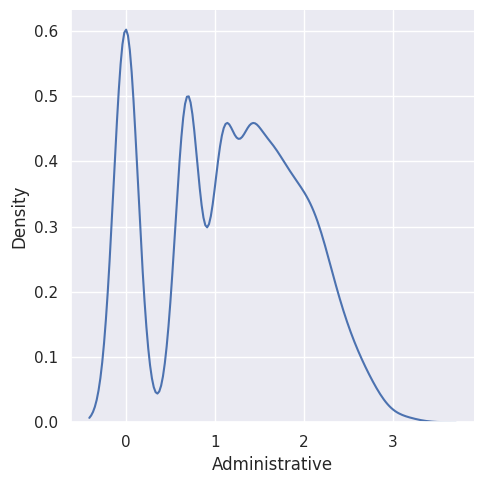

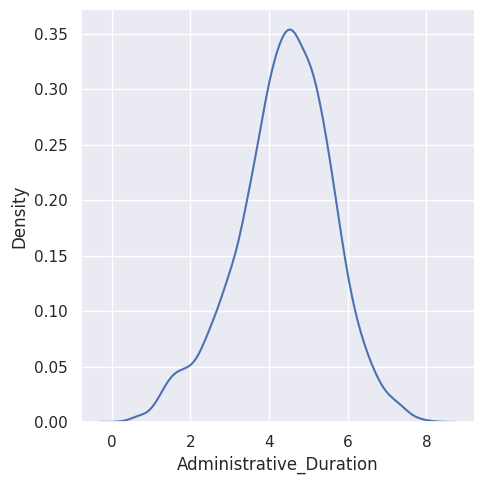

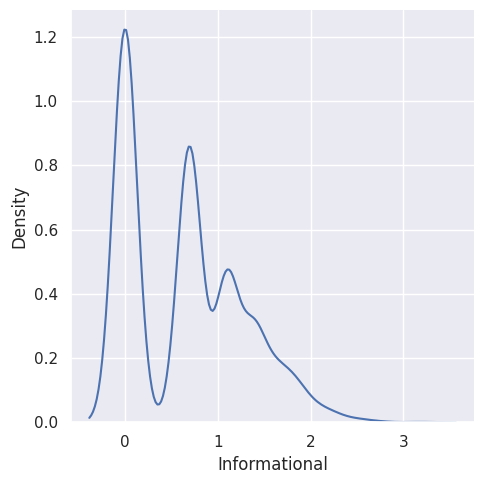

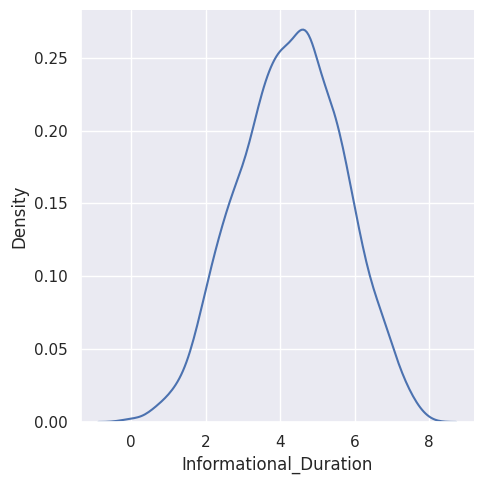

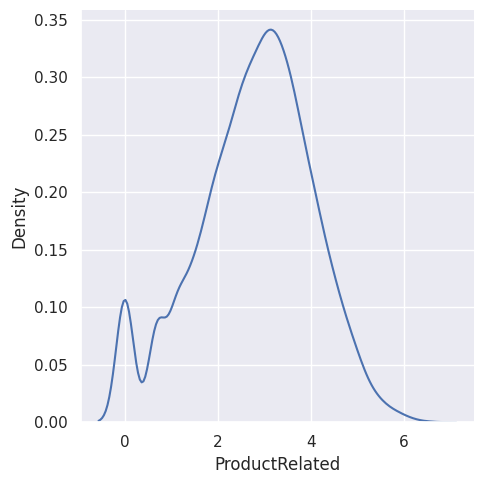

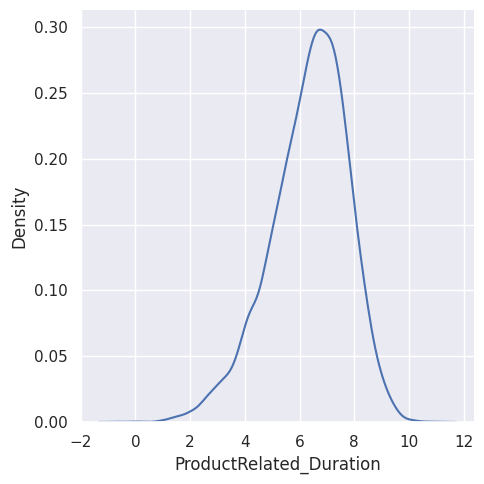

In [84]:
%matplotlib inline
sns.set()

#--- get the list of cols from the csv
aryCols = pdf_raw_csv.iloc[:, 0:6].columns

#--- 
for colName in aryCols:
  #Page type has the data so much tailored to the left so logarithmic transform is good transformation
  #sns.displot(np.log(pdf_raw_csv.iloc[:,0:6]), x=colName, kind="kde",)
  sns.displot(np.log(pdf_raw_csv[colName]), kind="kde",)

#### Findings
- Page Types
    - ProductRelated pages display a normal distribution.  Administrative and  Informational have some visibile variability
- Durations
    - the durations are for the most part normal distributions 

### Data Eng:  Inspect All Activity by Month 

<AxesSubplot:xlabel='Month'>

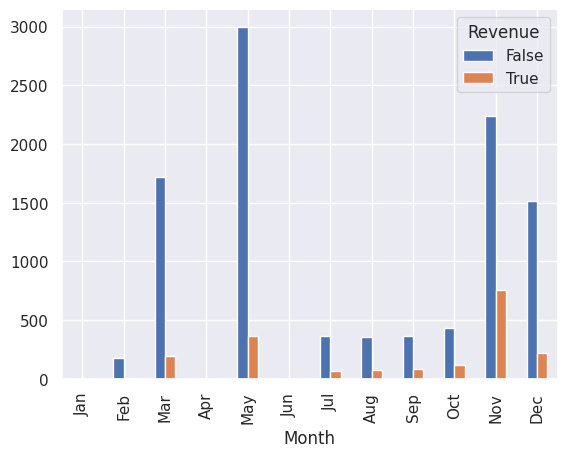

In [85]:
pdf_allActPerMonth = pdf_raw_csv.copy()
aryMonths = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
pdf_allActPerMonth['Month'] = pd.Categorical(pdf_allActPerMonth['Month'], 
                                          categories=aryMonths, 
                                          ordered=True)
pdf_allActPerMonth.pivot_table(index=['Month'], columns='Revenue', aggfunc='size').plot(kind='bar')

#### Findings:  revenue distribution
- March, May, Nov and Dec are the months with flagged revenue
- these months are also the months with the greatest activity;  ie even traffic with no associated revenue
- Q:  is it possible that some of the traffic tied to no revenue represents the browsing activity of the future purchsers, but in different sessions within the month? 


### Data Eng:  inspect revenue distribution, and activity distribution by month

In [86]:

#--- get the count of revenue instances by month
pdf_revByMonth = pdf_allActPerMonth[pdf_allActPerMonth["Revenue"]==True]
pdf_numRevByMonth = pdf_revByMonth.groupby("Month").size().reset_index(name="Percentage")
lngTotRevCount = pdf_revByMonth.shape[0]            #--- this is the total number of revenue instances

#--- calc %distribution of revenue instances by month (note: this is not by $revenue, but revenue _counts_)
pdf_numRevByMonth["Percentage"] = np.round((pdf_numRevByMonth["Percentage"]/lngTotRevCount)*100, 2)

pdf_numRevByMonth

,Month,Percentage
0,Jan,0.00
1,Feb,0.16
2,Mar,10.06
3,Apr,0.00
4,May,19.13
5,Jun,0.00
6,Jul,3.46
7,Aug,3.98
8,Sep,4.51
9,Oct,6.03


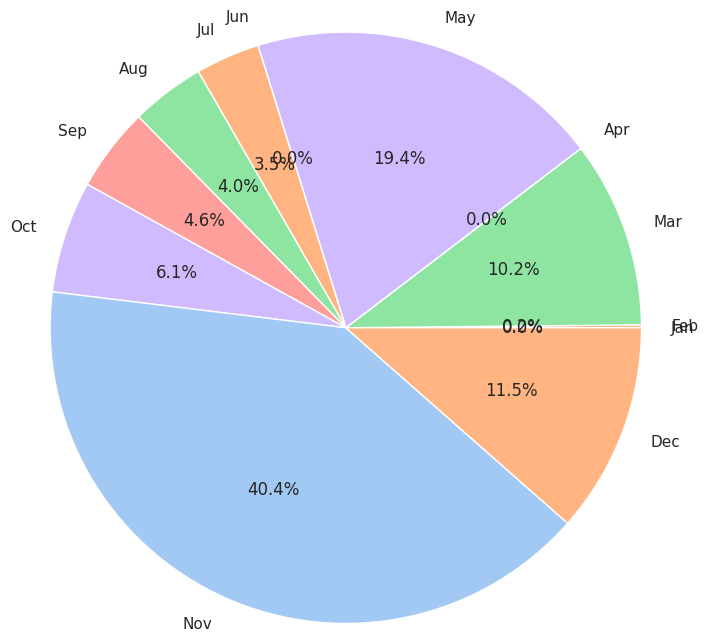

In [87]:

#--- create pie chart %distribution of revenue _instances_ by month
colors = sns.color_palette('pastel')[0:5]
plt.pie(pdf_numRevByMonth["Percentage"],labels= pdf_numRevByMonth["Month"], colors = colors, autopct='%.1f%%',radius=2)
plt.show()


#### Findings:  Confirmed revenue distribution (by count)
- the majority of revenue instances occured (desc order):  Nov - 40.4%, May - 19.4%, Dec - 11.5%, Mar - 10.2%
- note:  this is by cunt of revenue instance, not $size of sale 


### Data Eng:  inspect data distribution for BounceRates, ExitRates, PageValues, Revenue
- inspect the relationship between the features
- inspect the distribution of Revenue/No_Revenue 

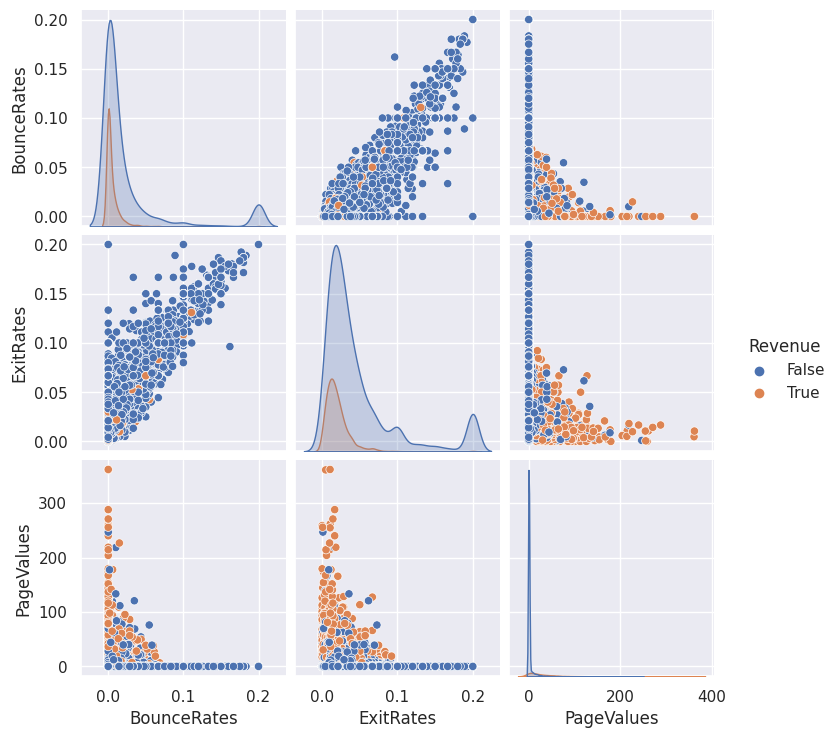

In [88]:
sns.pairplot(pdf_allActPerMonth[["BounceRates","ExitRates","PageValues","Revenue"]], hue="Revenue")

#### Findings:  
- The data with revenue has relatively low BounceRates,  ExitRates however high PageValues
- Q:  Does this support the earlier hypothesis that people who purchase are returning visitors with an intention to buy?


### Data Eng:  convert non-numeric cols to numeric

In [89]:
#--- map binary columns (Y/N to 1/0):  Weekend, Revenue
pdf_map = pdf_raw_csv.copy()
for strCol, colItems in pdf_map[["Revenue","Weekend"]].items():
    # Apply the mapping to the current column with the map() method for Pandas Series
    pdf_map[strCol] = colItems.map({ True : 1 , False : 0})

pdf_map.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [90]:
#--- map the month col values
map_months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12 
            }

pdf_map['Month'] = pdf_map['Month'].map(map_months)

pdf_map.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


### Data Eng:  One-hot encode categorical cols

In [95]:
#--- check to see which columns are categorical
colsCategorical = pdf_map.select_dtypes("object").columns
print(colsCategorical)

#--- confirmed:  VisitorType is the only object type

#--- dbl-check:  review all column data types
pdf_map.dtypes

Index(['VisitorType'], dtype='object')


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int64
Revenue                      int64
dtype: object

In [97]:
#--- one-hot encode the categorical features
pdf_map = pd.get_dummies(pdf_map)

pdf_map.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,0,1


### Feat Eng:  inspect correlated features

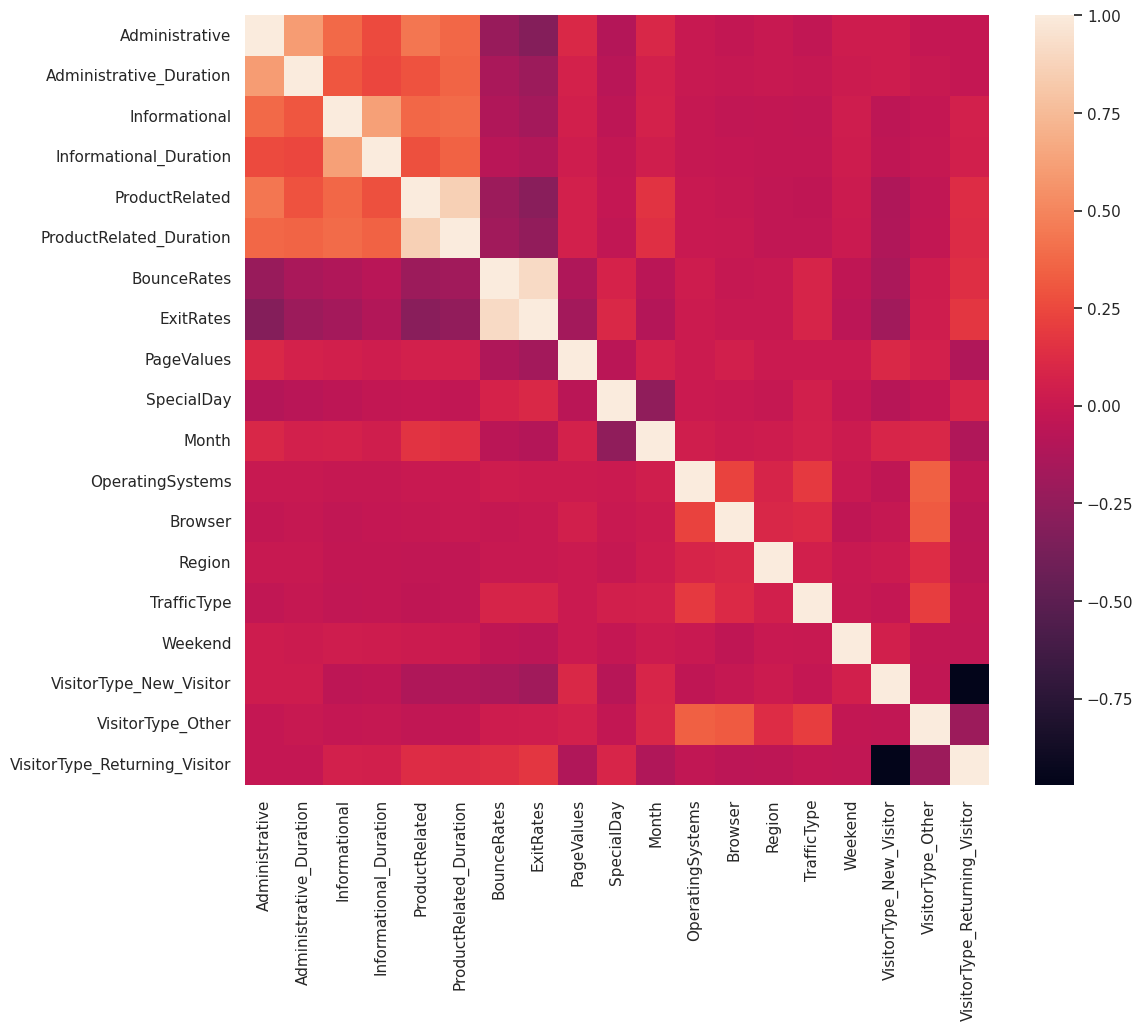

In [98]:
#--- store target feature
pdf_intent = pdf_map
y = pdf_intent.pop("Revenue")


#--- inspect correlated features
plt.figure(figsize=(12,10))
corr = pdf_intent.corr(method="pearson")
sns.heatmap(corr)
plt.show()

### Feat Selection

In [104]:
#--- let's remove all highly-correlated cols
sngThreshold = 0.8
lngNumFeats = corr.shape[0]
aryColsKeep = np.full((lngNumFeats,), True, dtype=bool)            #--- initialize tracking array

for idxRow in range(lngNumFeats):
    for idxCol in range(idxRow+1, lngNumFeats):
        if corr.iloc[idxRow, idxCol] >= sngThreshold:
            if aryColsKeep[idxCol]:
                aryColsKeep[idxCol] = False                              #--- flag col for drop;  highly correlated

aryColsSel = pdf_intent.columns[aryColsKeep]
print(aryColsSel)

#--- threshold 0.9:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', \
#                       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', \
#                       'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', \
#                       'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor']

#--- threshold 0.8:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', \
#                       'ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', \
#                       'Browser', 'Region', 'TrafficType', 'Weekend', 'VisitorType_New_Visitor', 'VisitorType_Other', \
#                       'VisitorType_Returning_Visitor']

#--- Note:  proceeding with a threshold of 0.8;  chose to relax threshold for sake of less cols and processing time
pdf_featNonCorr = pdf_intent[aryColsSel].copy()
pdf_featNonCorr.head()

#--- reminder:  target is not included in the non-corr feats;  y is stored seperately

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'Weekend', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.20,0.0,0.0,2,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,0.00,0.0,0.0,2,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.20,0.0,0.0,2,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,0.05,0.0,0.0,2,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,0.02,0.0,0.0,2,3,3,1,4,1,0,0,1


### Normalize Data:  Standard Scaling

In [108]:

#--- apply standard scalar to normalize col data
sclStd = StandardScaler()

npa_featScaled = sclStd.fit_transform(pdf_featNonCorr.copy())
pdf_featScaled = pd.DataFrame(npa_featScaled, columns=aryColsSel)

#--- reassign the target feature
pdf_featScaled["tgtHasRevenue"] = y
pdf_featScaled.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,tgtHasRevenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.667189,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,-0.550552,-0.399087,-0.083316,0.410621,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,-0.550552,-0.399087,-0.083316,0.410621,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.667189,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,-0.550552,-0.399087,-0.083316,0.410621,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,-0.550552,-0.399087,-0.083316,0.410621,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,1.816360,-0.399087,-0.083316,0.410621,0


### Train / Test Split

In [ ]:

#--- ready train dataset:   months June-Dec
#--- ready test dataset:  months Feb-Mar
aryTrainMths = [6,7,8,9,10,11,12]
aryTestMths = [2,3]

pdfTrain = pdf_featScaled[pdf_featScaled['Month'].isin(aryTrainMths)]
pdfTest = pdf_featScaled[pdf_featScaled['Month'].isin(aryTestMths)]

y_train = pdfTrain.pop('tgtHasRevenue')
x_train = pdfTrain.to_numpy()

y_test = pdfTest.pop('tgtHasRevenue')
x_test = pdfTest.to_numpy()
 

### Model Fitting

### Model Performance

### Model Selection

# Task 2:  Customer Segmentation

# Task 3:  Semi-Supervised Learning

## Data Engineering

## Self-labelling

## Comparison of Model Performance:  labels only vs labels and self-labels

# Conclusions

## Supervised Learning

## Unsupervised Learning

## Semi-supervised Learning